In [2]:
import pandas as pd
import datetime
from datetime import datetime
# from datetime import date
# from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import dvv_module
from obspy import UTCDateTime
import scipy
import h5py

In [3]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
client = Client("ETH")
# latitude    =   47.320211
# longitude   =   7.39065
# maxradius   =   0.18
minlatitude = 47.302670
minlongitude = 7.086450
maxlatitude = 47.393640
maxlongitude = 7.33701
starttime = UTCDateTime("2022-11-18")
endtime = UTCDateTime("2024-03-01")
cat = client.get_events(starttime=starttime, endtime=endtime, minmagnitude=1, maxlatitude=maxlatitude, maxlongitude=maxlongitude, minlatitude=minlatitude, minlongitude=minlongitude)
mag = []
time = []
lat = []
long = []
depth = []
for event in cat:
    mag.append(event.magnitudes[0].mag)
    time.append(event.origins[0].time)
    lat.append(event.origins[0].latitude)
    long.append(event.origins[0].longitude)
    depth.append(event.origins[0].depth)
datetime = []
for ti in range(len(time)):
    datetime.append(time[ti].datetime)
events = pd.DataFrame(
    {'time': datetime,
     'mag': mag,
     'lat': lat,
     'long': long,
     'depth': depth,
    })
events.sort_values(by='mag', inplace=True, ascending=False)
events.time = pd.to_datetime(events.time, yearfirst=True)
events = events.reset_index(drop=True)
events[:2].to_csv("events_MOUTI.csv",index=False)

In [20]:
cat

6 Event(s) in Catalog:
2024-01-04T09:07:29.699874Z | +47.355,   +7.153 | 1.42 MLhc | manual
2024-01-04T00:04:19.707245Z | +47.363,   +7.129 | 1.14 MLhc | manual
2023-12-15T09:21:36.593629Z | +47.330,   +7.183 | 1.60 MLhc | manual
2023-11-16T13:11:35.554843Z | +47.332,   +7.194 | 1.11 MLhc | manual
2023-08-24T06:41:29.777644Z | +47.330,   +7.195 | 1.62 MLhc | manual
2023-04-28T11:55:54.082881Z | +47.326,   +7.187 | 1.10 MLhc | manual

In [29]:
cat[0]

Event:	2024-01-04T09:07:29.699874Z | +47.355,   +7.153 | 1.42 MLhc | manual

	            resource_id: ResourceIdentifier(id="smi:ch.ethz.sed/sc20a/Event/2024agfilc")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='SED', author='scevent@sc20a', creation_time=UTCDateTime(2024, 1, 4, 9, 7, 37, 254141))
	    preferred_origin_id: ResourceIdentifier(id="smi:ch.ethz.sed/sc20ag/Origin/NLL.20240104130817.574086.227097")
	 preferred_magnitude_id: ResourceIdentifier(id="smi:ch.ethz.sed/sc20ag/Magnitude/20240104130824.69192.227116")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements

In [5]:
events

,time,mag,lat,long,depth
0,2023-08-24 06:41:29.777644,1.617422,47.330313,7.195185,664.062500
1,2023-12-15 09:21:36.593629,1.596404,47.329904,7.183487,19.531250
2,2024-01-04 09:07:29.699874,1.416330,47.354615,7.152903,-695.800781
3,2024-01-04 00:04:19.707245,1.136522,47.363159,7.129268,-620.117188
4,2023-11-16 13:11:35.554843,1.108087,47.332462,7.194034,-405.273438
5,2023-04-28 11:55:54.082881,1.099567,47.326425,7.186680,-341.796875


In [35]:
t1 = UTCDateTime("2023-08-24 06:41:0")
t2 = UTCDateTime("2023-08-24 06:42:30")
st = client.get_waveforms("CH", "MOUTI", "*", "HH*", t1, t2)

In [36]:
print(st)

3 Trace(s) in Stream:
CH.MOUTI..HHE | 2023-08-24T06:41:00.000000Z - 2023-08-24T06:42:30.000000Z | 200.0 Hz, 18001 samples
CH.MOUTI..HHN | 2023-08-24T06:41:00.000000Z - 2023-08-24T06:42:30.000000Z | 200.0 Hz, 18001 samples
CH.MOUTI..HHZ | 2023-08-24T06:41:00.000000Z - 2023-08-24T06:42:30.000000Z | 200.0 Hz, 18001 samples


/scratch/ipykernel_1358472/3142910649.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


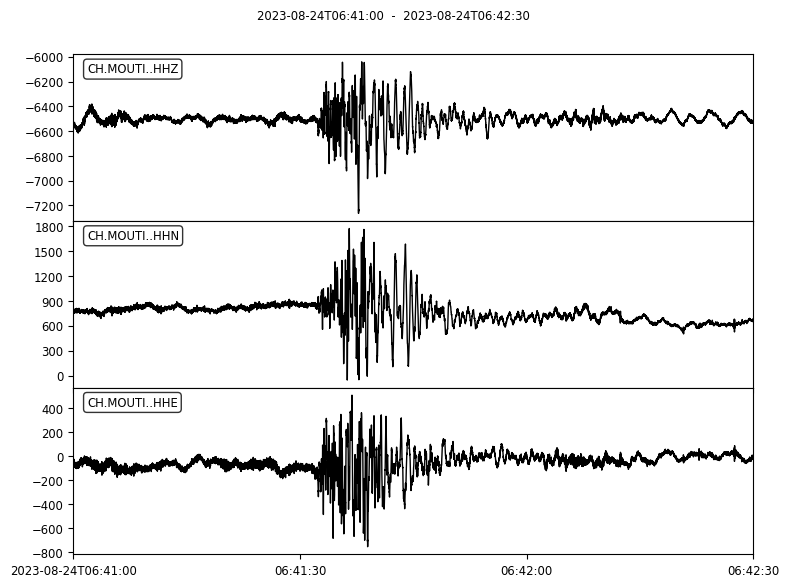

In [44]:
tr = st[0]
tr1 = st[1]
tr2 = st[1]
new_st = st.select(channel='*')

# Plot the Stream object
fig = new_st.plot(equal_scale=False, size=(800, 600), handle=True, show=False)

# Save the figure
fig.savefig("earthquake_mouti.png")

fig.show()

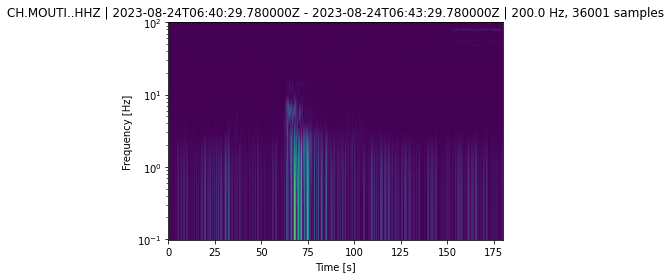

In [18]:
tr.spectrogram(log=True, fmt='spectro.png')

In [46]:
st2 = client.get_waveforms("CH", "SAIRA", "*", "HH*", t1, t2)

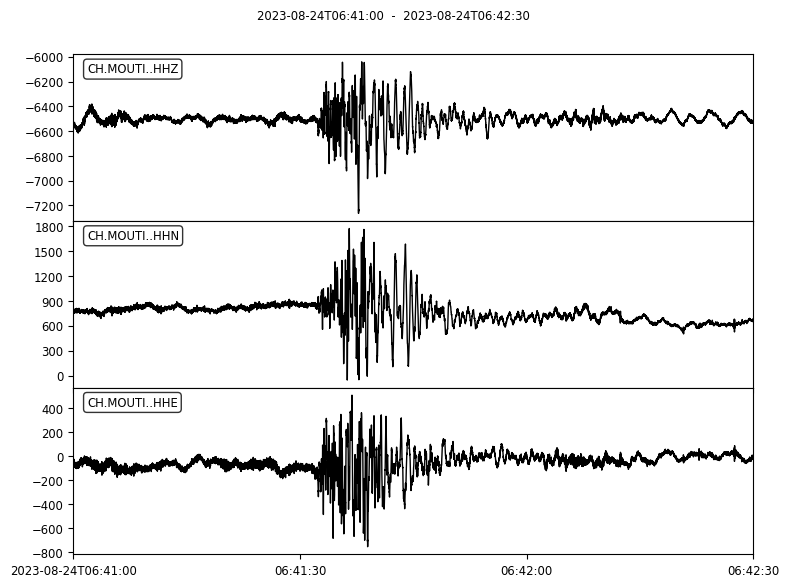

In [ ]:
tr20 = st2[0]
tr21 = st2[1]
tr22 = st2[1]
# tr.remove_response()
new_st2 = st.select(channel='*')

# Plot the Stream object
fig = new_st2.plot(equal_scale=False, size=(800, 600), handle=True, show=False)

# Save the figure
fig.savefig("earthquake_saira.png")